# Statistical Power and Confidence Intervals

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
from math import sqrt

## Statistical Power & Effect Size

In [2]:
# cohen's d for independent samples

from numpy.random import randn
from numpy import var

def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u1 - u2) / s

data1 = 10 * randn(10000) + 60
data2 = 10 * randn(10000) + 55

d = cohend(data1, data2)
print('Cohens d: %.3f' % d)

Cohens d: 0.507


In [3]:
# estimate sample size via power analysis

from statsmodels.stats.power import TTestIndPower

effect = 0.8
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


C:\Users\17809\AppData\Roaming\Python\Python38\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


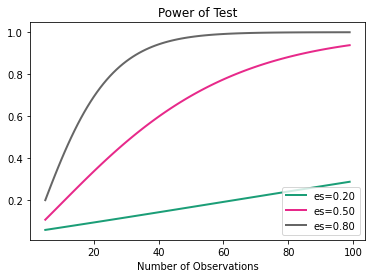

In [4]:
# power curves for varying sample and effect size
from statsmodels.stats.power import TTestIndPower

# parameters
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

# power curves
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

# Confidence Intervals

In [5]:
from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


## Bootstrapped Confidence Intervals

In [6]:
### Cohen

In [15]:
popN = int(1e7)
population = (4*np.random.randn(popN))**2
popMean = np.mean(population)

In [20]:
samplesize = 30
confidence = 90

randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples]) # used later for analytic solution

numBoots  = 1000
bootmeans = np.zeros(numBoots)

for booti in range(numBoots):
    bootmeans[booti] = np.mean( np.random.choice(sampledata,samplesize) )
    
confint = [0,0] # initialize
confint[0] = np.percentile(bootmeans,(100-confidence)/2)
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2)

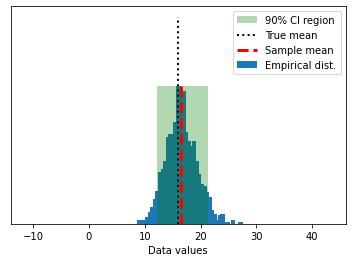

In [19]:
from matplotlib.patches import Polygon

fig,ax = plt.subplots(1,1)

y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean','Empirical dist.'))
plt.show()

In [21]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Analytic:  %g - %g'%(confint2[0],confint2[1]))

Empirical: 7.92603 - 19.984
Analytic:  7.685 - 20.304


### Brownlee

In [29]:
# from numpy.random import seed
from numpy.random import rand
from numpy.random import randint
# from numpy import mean
# from numpy import median
# from numpy import percentile

dataset = 0.5 + rand(1000) * 0.5

scores = list()
for _ in range(100):

    indices = randint(0, 1000, 1000)
    sample = dataset[indices]

    statistic = np.mean(sample)
    scores.append(statistic)
    
print('50th percentile (median) = %.3f' % np.median(scores))

alpha = 5.0

lower_p = alpha / 2.0

lower = max(0.0, np.percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))

upper_p = (100 - alpha) + (alpha / 2.0)

upper = min(1.0, np.percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 0.754
2.5th percentile = 0.744
97.5th percentile = 0.761
